## Greek run

In this exercise you will use numpy and matplotlib to simulate the greek run. The greek run works as follows:
- There are 5 players(1,2,3,4,5) at positions 0,20,40,60,80
- Players 1,2,3,4 are moving towards the right and player 5 is moving towards the left
- If 2 players meet they both switch directions they are running
- If a player's position is below 0 or above 100, they are safe
- The last player to exit looses

Which player looses?

In [1]:
%pip install matplotlib numpy

  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl (12.8 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 12.8 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl (7.0 MB)

   ---------------------------------------- 0/8 [pyp

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
from IPython import display

Steps before last player: 81
Total steps: 100


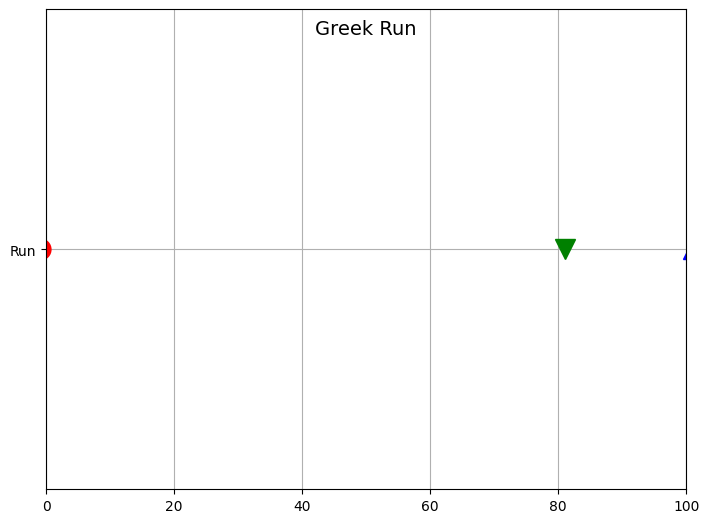

In [9]:
# Step 1
# - Create the line with the correct positions as an np.array
# - Assign a True if the player is still playing to each player as an np.array
# - Assign a direction to each player as an np.array
# - choose 5 colors for the players
# - choose 5 markers for the players
# - Using for x in zip(posizioni,direction,colors,markers): , plot: the initial positions, the the x limit from 0-100, set the y limit from -0.2 - 0.2

posizioni= np.array([0,20,40,60,80])
play= np.array([True,True,True,True,True])
direction= np.array([1,1,1,1,-1])
colors= ['r','g','b','c','m']
markers= ['o','v','^','<','>']

fig=plt.figure();
ax = fig.add_axes((0, 0, 1, 1));
fig.suptitle('Greek Run',fontsize=14)

def plot_players(ax, posizioni, colors, markers):
    
    # for x in zip(posizioni,colors,markers):
    #     pos = x[0]
    #     col = x[1]
    #     mark = x[2]

    for pos, col, mark in zip(posizioni,colors,markers):
        ax.plot(pos,0,color=col,marker=mark,markersize=15)
        ax.grid()
        ax.set_xlim(0,100)
        ax.set_ylim(-0.2,0.2)
        ax.set_yticks([0])
        ax.set_yticklabels(['Run'])

plot_players(ax, posizioni, colors, markers)

display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(1.0)

step = 0

while len(play[play==True]) > 1:
    # Step 2
    # - add a step in the correct direction to each player
    # - Check whether any players are out of the game
    # - Check if some players have met, if they did, change their direction
    step += 1
    posizioni = posizioni + direction
    play[posizioni < 0] = False
    play[posizioni > 100] = False

    for i in range(len(posizioni)-1):
        if posizioni[i] == posizioni[i+1] and play[i] and play[i+1]:
            direction[i] = -direction[i]
            direction[i+1] = -direction[i+1]
            # direction[i], direction[i+1] = direction[i+1], direction[i]

    ax.clear()
# Step 3
# - Plot the new positions using the code from step 1
    plot_players(ax, posizioni, colors, markers)
       
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)

display.clear_output()
display.display(plt.gcf())
display.clear_output()


# Step 4
# - Count the remaining steps for the last player
# - calculate the total number of steps
# - print the total amount of steps.
if direction[play==True] == 1:
    step_last=100-posizioni[play==True]
else:
    step_last=posizioni[play==True]

tot_step=step+step_last[0]

print("Steps before last player:",step)
print("Total steps:",tot_step)